<a href="https://colab.research.google.com/github/bforoura/IDS/blob/main/contingency_tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contingency Tables**

* To help quantify the relationship between a **categorical predictor** and the **target**, we can construct a contingency table

* A contingency table is a cross‐tabulation of the two variables, and contains a cell for every combination of variable values, i.e., every **contingency**.

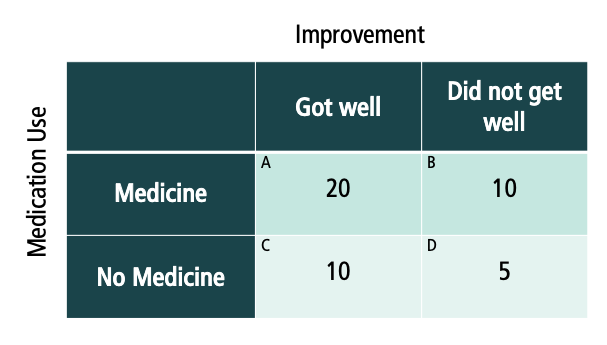

* The table can be described in terms of the number of observations that fall into a given cell of the table, e.g.  is the number of observations that have level  for the first variable and level for the second variable. 

* Note that each variable must have a finite number of levels (or categories), which can be either ordered or unordered. 

* In different contexts, the variables defining the axes of a contingency table may be called categorical variables or factor variables. 

* They may be either nominal (if their levels are unordered) or ordinal (if their levels are ordered



#### **Cell Magic**
* We would like to run both Python and R in this notebook.
* The following allows mixing of Python and R cell codes:

In [1]:
# Start rmagic to mix Python and R code sells
%load_ext rpy2.ipython


In [2]:
import pandas as pd


diseaseDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/arthritis.csv");

diseaseDF



,ID,Treatment,Sex,Age,Improved
0,57,Treated,Male,27,Some
1,46,Treated,Male,29,None
2,77,Treated,Male,30,None
3,17,Treated,Male,32,Marked
4,36,Treated,Male,46,Marked
...,...,...,...,...,...
79,32,Placebo,Female,66,None
80,42,Placebo,Female,66,None
81,15,Placebo,Female,66,Some
82,71,Placebo,Female,68,Some


In [3]:
# Cross tabulation of Treatment and Improved

p_crosstab = pd.crosstab(diseaseDF.Treatment, diseaseDF.Improved)

print(p_crosstab)



Improved   Marked  None  Some
Treatment                    
Placebo         7    29     7
Treated        21    13     7


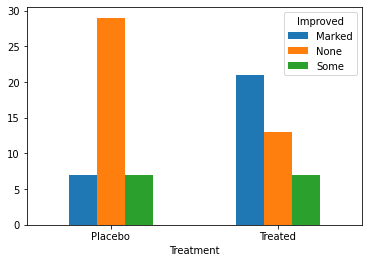

In [4]:
# Creating barplot

# x label rotation
barplot = p_crosstab.plot.bar(rot=0)





In [5]:
%%R

library(readr)
diseaseDF <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/arthritis.csv", show_col_types = FALSE)


# For some reason Age is read as text, so let's convert it to numeric
diseaseDF$Age <- as.numeric(diseaseDF$Age)

summary(diseaseDF)




       ID         Treatment             Sex                 Age       
 Min.   : 1.00   Length:84          Length:84          Min.   :23.00  
 1st Qu.:21.75   Class :character   Class :character   1st Qu.:46.00  
 Median :42.50   Mode  :character   Mode  :character   Median :57.00  
 Mean   :42.50                                         Mean   :53.36  
 3rd Qu.:63.25                                         3rd Qu.:63.00  
 Max.   :84.00                                         Max.   :74.00  
   Improved        
 Length:84         
 Class :character  
 Mode  :character  
                   
                   
                   


In [6]:
%%R


r_crosstab <- table(diseaseDF$Improved, diseaseDF$Treatment)

ftable(r_crosstab)
                         



        Placebo Treated
                       
Marked        7      21
None         29      13
Some          7       7


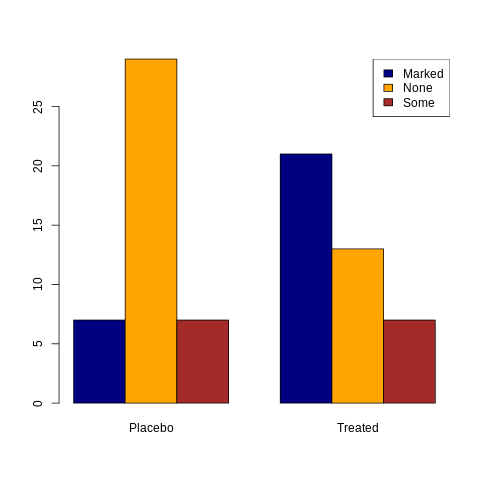

In [7]:
%%R

colors <- c("navy", "orange", "brown")

barplot(r_crosstab, col = colors, beside = TRUE)
legend("topright", legend = c("Marked", "None", "Some"), fill = colors)




# **Histograms With Response Overlay**

* A histogram is a graphical representation of a frequency distribution for a numerical variable.

* The plot shown below is the histogram of the **Age** variable with an overlay of the response **Improved** 

* Since we are creating a histogram of **Age** using an overlay of **Improved**, we separate the variable age as follows:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

bt_age_Some = diseaseDF[diseaseDF.Improved == "Some"]['Age']
bt_age_None = diseaseDF[diseaseDF.Improved == "None"]['Age']
bt_age_Marked = diseaseDF[diseaseDF.Improved == "Marked"]['Age']




* Once the variables are created, we can create a **stacked histogram** of the two
variables.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


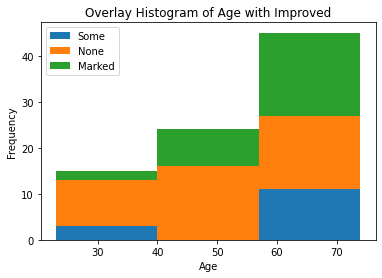

In [9]:
plt.hist([bt_age_Some, bt_age_None, bt_age_Marked], bins = 3, stacked = True)
plt.legend(['Some', 'None', 'Marked'])

plt.title('Overlay Histogram of Age with Improved')

plt.xlabel('Age'); plt.ylabel('Frequency'); plt.show()



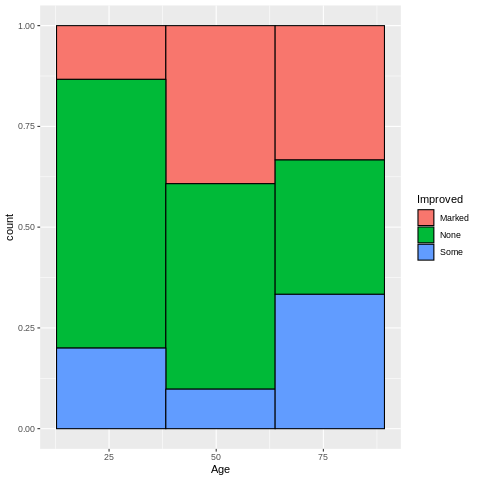

In [10]:
%%R

library(ggplot2)

ggplot(diseaseDF, aes(Age)) + geom_histogram(aes(fill = Improved), color="black", position = "fill", bins="3")




# **Binning**

* Some machine learning algorithms work better with categorical rather than numeric variables, so it may be useful for the analyst to use **binning** to derive new categorical variables based on how the different sets of values of the numeric predictor behave with respect to the response. 


* For example, consider the previous two overlay plots. To optimize our analysis from the data, we ask ourselves: How can we categorize the numerical values of age so that the categories had widely varying response proportions? 

* Clearly, one category would be the aged 58 and up, who have high Improved rates. 

* The middle-aged group 40-58 also has high Improved rates.. 

* Finally, there is the youngest group (up to 40) which also has the lowest Improved rate. 

* Thus, we could roughly define our new variable as follows 
* **age_binned** = 
> 1. under 40
> 2. 40 to 58
> 3. 58 and up



### **Best Practice**

* Many software packages provide **automatic** binning methods, such as **equal‐
category‐width** binning or **equal‐number‐of‐records‐per‐category** binning.  

* Though these may have their uses, if you are interested in enhancing the predictive power of your analysis, you should always try to use the binning based on a predictive value (e.g. **Improved**) as we have demonstrated here.

## **Binning in Python**

* Bin the values using **cut()** from the pandas package:

In [11]:
diseaseDF['Age_binned'] = pd.cut(x = diseaseDF['Age'], 
            bins = [0, 40, 58, 100],
            labels=["Under_40", "40_to_58", "Over_58"], 

            # include the right-hand cutpoint
            right = True)


# check bin sizes
diseaseDF['Age_binned'].value_counts()



Over_58     37
40_to_58    32
Under_40    15
Name: Age_binned, dtype: int64

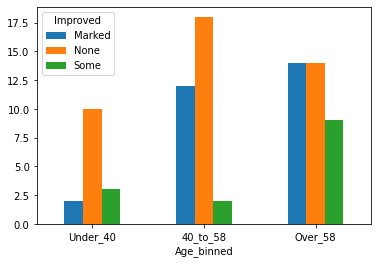

In [12]:
# Cross tabulation of Age_Binned and Improved

p_crosstab = pd.crosstab(diseaseDF.Age_binned, diseaseDF.Improved)

# x label rotation
barplot = p_crosstab.plot.bar(rot=0)


# **Binning in R**

* To create our categorical variable, we will use the **cut()** command on the Age variable.

In [13]:
%%R

diseaseDF$Age_binned <- cut(x = diseaseDF$Age, breaks = c(0, 40, 58, 100),
       right = TRUE, 
       labels = c("Under_40", "40_to_58","Over_58"))

# check the bin sizes
table(diseaseDF$Age_binned)




Under_40 40_to_58  Over_58 
      15       32       37 


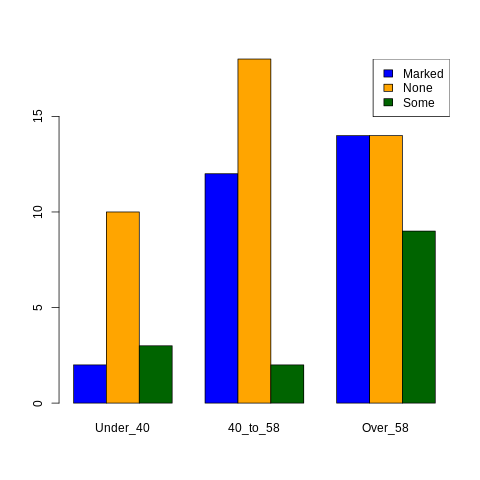

In [14]:
%%R 

r_crosstab <- table(diseaseDF$Improved, diseaseDF$Age_binned )

colors <- c("blue", "orange", "darkgreen")

barplot(r_crosstab, col = colors, beside = TRUE)
legend("topright", legend = c("Marked", "None", "Some"), 
       fill = colors)



# **References**

* Data Sciene Using Python and R, Larose and Larose, Wiley, 2019
* https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/cut